In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', delimiter=',', header=0)
    
df = df.drop(['tanggal'], axis=1)
df.head()

,latitude,longitude,kelurahan,kecamatan,wilayah
0,-6.140977,106.766575,Kapuk,Cengkareng,Kota Administrasi Jakarta Barat
1,-6.112499,106.899001,Koja,Koja,Kota Administrasi Jakarta Utara
2,-6.118336,106.916949,Lagoa,Koja,Kota Administrasi Jakarta Utara
3,-6.201144,106.839852,Pegangsaan,Menteng,Kota Administrasi Jakarta Pusat
4,-6.167022,106.934411,Cakung Barat,Cakung,Kota Administrasi Jakarta Timur


In [3]:
df.dtypes

latitude     float64
longitude    float64
kelurahan     object
kecamatan     object
wilayah       object
dtype: object

In [4]:
df['kelurahan'] = df['kelurahan'].astype('category')
df['kecamatan'] = df['kecamatan'].astype('category')
df['wilayah'] = df['wilayah'].astype('category')


df.head(40)

,latitude,longitude,kelurahan,kecamatan,wilayah
0,-6.140977,106.766575,Kapuk,Cengkareng,Kota Administrasi Jakarta Barat
1,-6.112499,106.899001,Koja,Koja,Kota Administrasi Jakarta Utara
2,-6.118336,106.916949,Lagoa,Koja,Kota Administrasi Jakarta Utara
3,-6.201144,106.839852,Pegangsaan,Menteng,Kota Administrasi Jakarta Pusat
4,-6.167022,106.934411,Cakung Barat,Cakung,Kota Administrasi Jakarta Timur
5,-6.281133,106.816408,Cilandak Timur,Pasar Minggu,Kota Administrasi Jakarta Selatan
6,-6.151604,106.817043,Keagungan,Tamansari,Kota Administrasi Jakarta Barat
7,-6.140936,106.840674,Pademangan Timur,Pademangan,Kota Administrasi Jakarta Utara
8,-6.115515,106.689156,Kalideres,Kalideres,Kota Administrasi Jakarta Barat
9,-6.177591,106.815039,Petojo selatan,Gambir,Kota Administrasi Jakarta Pusat


In [5]:
df.dtypes

latitude      float64
longitude     float64
kelurahan    category
kecamatan    category
wilayah      category
dtype: object

In [6]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['kelurahan', 'kecamatan', 'wilayah'], dtype='object')

In [7]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head(30)

,latitude,longitude,kelurahan,kecamatan,wilayah
0,-6.140977,106.766575,105,2,0
1,-6.112499,106.899001,147,20,4
2,-6.118336,106.916949,160,20,4
3,-6.201144,106.839852,196,25,1
4,-6.167022,106.934411,16,0,3
5,-6.281133,106.816408,36,29,2
6,-6.151604,106.817043,116,37,0
7,-6.140936,106.840674,184,26,4
8,-6.115515,106.689156,96,13,0
9,-6.177591,106.815039,213,8,1


3    335
0    305
2    304
4    253
1    185
Name: wilayah, dtype: int64
Proportion :  1.65 : 1
--------Plot wilayah--------


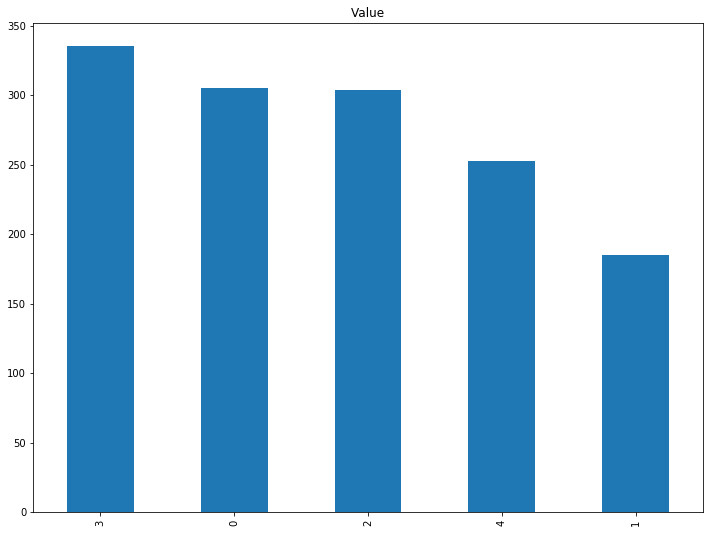

In [8]:
print(df['wilayah'].value_counts())
target_count = df.wilayah.value_counts()
print('Proportion : ', round(target_count[0]/target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Value', figsize=(12, 9))
print('--------Plot wilayah--------')

2     65
0     60
4     60
31    57
40    53
7     52
29    51
38    45
5     43
16    43
33    42
13    41
19    38
3     37
10    36
15    36
11    34
26    34
39    33
14    32
41    31
21    31
35    29
9     29
27    28
28    27
20    27
12    26
8     26
17    22
6     22
34    22
32    21
23    20
30    20
24    19
18    19
25    18
37    16
36    13
22    12
1     12
Name: kecamatan, dtype: int64
Proportion :  5.0 : 1
--------Plot kecamatan--------


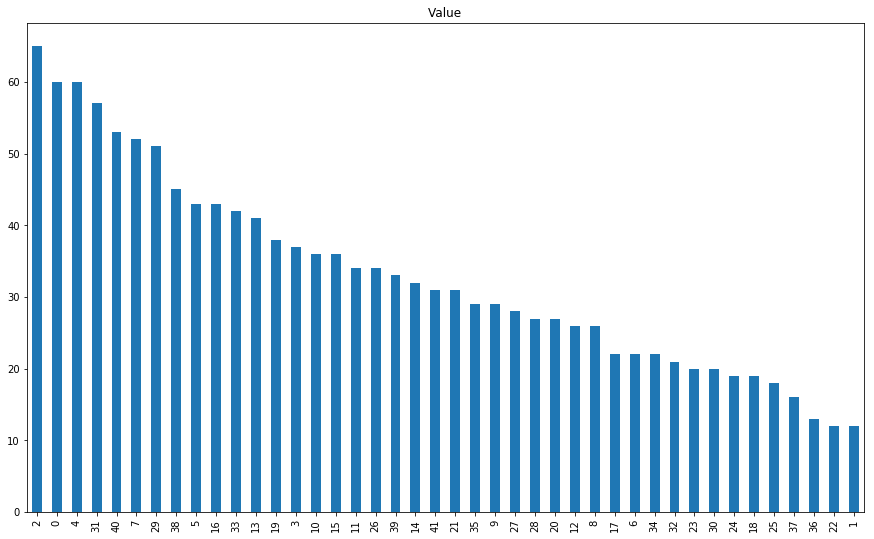

In [9]:
print(df['kecamatan'].value_counts())
target_count = df.kecamatan.value_counts()
print('Proportion : ', round(target_count[0]/target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Value', figsize=(15, 9))
print('--------Plot kecamatan--------')

208    18
223    17
271    15
16     15
184    14
207    14
140    13
105    13
85     13
25     13
52     12
106    12
250    12
134    12
183    12
225    11
143    11
195    11
190    10
272    10
146    10
253    10
287    10
95     10
26     10
200    10
42     10
252     9
34      9
58      9
       ..
303     1
305     1
222     1
218     1
217     1
216     1
74      1
82      1
90      1
92      1
100     1
108     1
115     1
131     1
139     1
149     1
150     1
156     1
158     1
162     1
165     1
167     1
168     1
170     1
173     1
185     1
186     1
202     1
212     1
155     1
Name: kelurahan, Length: 311, dtype: int64
Proportion :  1.17 : 1
--------Plot kelurahan--------


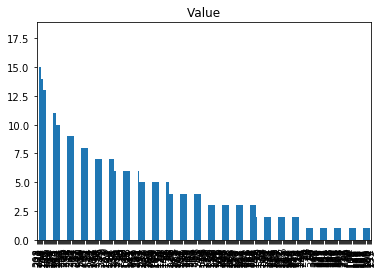

In [10]:
%matplotlib inline
print(df['kelurahan'].value_counts())
target_count = df.kelurahan.value_counts()
print('Proportion : ', round(target_count[0]/target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Value')
print('--------Plot kelurahan--------')

In [11]:
# DBSCAN param
min_sample = 10
epsilon = 1

In [12]:
# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=epsilon, min_samples=min_sample).fit(df)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = n_clusters + 1
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

In [13]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(df))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 27
Total Data :  1382
Estimated number of noise points: 1055
Silhouette Coefficient: -0.439


In [14]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

print('Cluster found : ', n_clusters)

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    xy = df[class_member_mask & core_samples_mask]
    print('\n', xy,'\nMember of Cluster : ', len(xy))

Cluster found :  27

       latitude   longitude  kelurahan  kecamatan  wilayah
0    -6.140977  106.766575        105          2        0
100  -6.135537  106.749751        105          2        0
119  -6.144753  106.749975        105          2        0
383  -6.129756  106.740542        105          2        0
457  -6.147827  106.750642        105          2        0
553  -6.131167  106.742790        105          2        0
589  -6.141317  106.741557        105          2        0
720  -6.145430  106.760551        105          2        0
910  -6.139021  106.752991        105          2        0
1052 -6.142625  106.761157        105          2        0
1143 -6.148547  106.771355        105          2        0
1160 -6.133993  106.745548        105          2        0
1238 -6.140576  106.753001        105          2        0 
Member of Cluster :  13

       latitude   longitude  kelurahan  kecamatan  wilayah
4    -6.167022  106.934411         16          0        3
189  -6.183831  106.928